# Credit Card Spending Habits in India

# Overview
This project offers a comprehensive data analysis of credit card spending habits in India, aiming to reveal consumer behavior, trends, and transaction patterns. Key aspects include:

- Detailed examination of spending habits
- Analysis across various dimensions
- Insights into consumer behavior and trends
- Data-driven visualization for enhanced understanding

This dataset provides valuable insights into credit card usage.

# Dataset
Credit card spending habit : Credit Card Spending Habits in India is a dataset containing thousands of samples of the number of credit card transactions in India by city, date, card type,experience type and gender.

* City: Uncover regional spending patterns by identifying the city where each transaction occurred.
* Date: Analyze temporal trends and seasonal variations in credit card usage over time.
* Card Type: Understand the impact of different credit card types on spending behavior.
* Exp Type: Categorize transactions by expense type, offering insights into consumer priorities.
* Gender: Explore spending variations based on the gender of the cardholder.
* Amount: Quantify the financial aspect of each transaction, facilitating numerical analysis.

## Import required python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import variation

## Load Dataset

In [2]:
df=pd.read_csv('Credit card transactions - India - Simple.csv', index_col='index')

## Checking Dataset

In [3]:
df.head(10)

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247


## Checking data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


#### *Found date column is in object type. So converting it in date time type.No missing values were identified in the dataset.*

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


C:\Users\VINAMRATA CHHONKAR\AppData\Local\Temp\ipykernel_20432\2345423161.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


 ## Descriptive Analysis

#### Descriptive statistics for integer columns

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,26052,2014-07-30 11:34:44.385075968,2013-10-04 00:00:00,2014-03-02 00:00:00,2014-08-02 00:00:00,2014-12-28 00:00:00,2015-05-26 00:00:00,NaN
Amount,26052.0,156411.537425,1005.0,77120.25,153106.5,228050.0,998077.0,103063.254287


### Descriptive statistics for object columns

In [7]:
df.describe(include="object").T

,count,unique,top,freq
City,26052,986,"Bengaluru, India",3552
Card Type,26052,4,Silver,6840
Exp Type,26052,6,Food,5463
Gender,26052,2,F,13680


### Dropping the column named "index" as it is no use

In [8]:
df.drop("index", axis=1, inplace=True, errors='ignore')
df.head(5)

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


### Plotting histogram to check distribution of data

C:\Users\VINAMRATA CHHONKAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


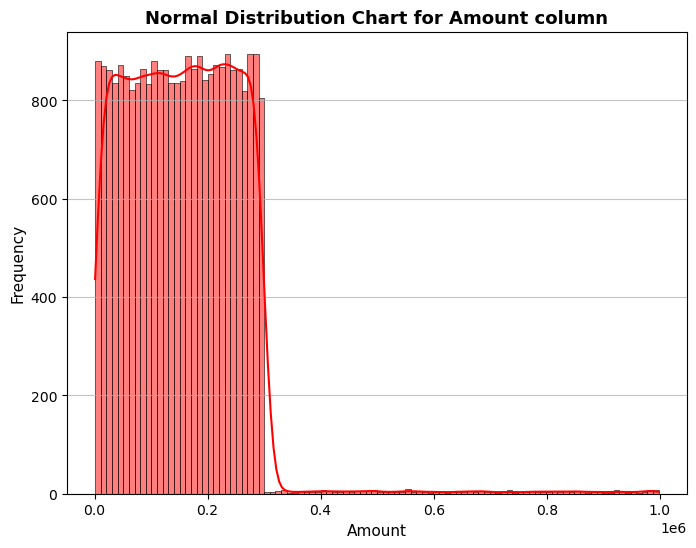

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], kde=True, color='red', edgecolor='black', bins=100)
plt.title('Normal Distribution Chart for Amount column',fontsize=13,weight='bold')
plt.xlabel('Amount',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
plt.grid(axis='y', alpha=0.75)
plt.show()

*The data analysis shows that most values are concentrated towards the lower end, creating a tail towards higher values, indicating a right-skewed distribution. Despite this, the data still shows a balance around the center, with some higher values on the right side.*

## Data Visualization

### Plotting a pie chart to visualize the distribution of credit card usage in the top 7 cities where the usage is the highest

In [10]:
df[['City', 'Country']]=df['City'].str.split(", ", expand=True)
df

,City,Date,Card Type,Exp Type,Gender,Amount,Country
index,,,,,,,
0,Delhi,2014-10-29,Gold,Bills,F,82475,India
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,India
2,Bengaluru,2014-08-27,Silver,Bills,F,101738,India
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,India
4,Bengaluru,2015-05-05,Gold,Bills,F,171574,India
...,...,...,...,...,...,...,...
26047,Kolkata,2014-06-22,Silver,Travel,F,128191,India
26048,Pune,2014-08-03,Signature,Travel,M,246316,India
26049,Hyderabad,2015-01-16,Silver,Travel,M,265019,India


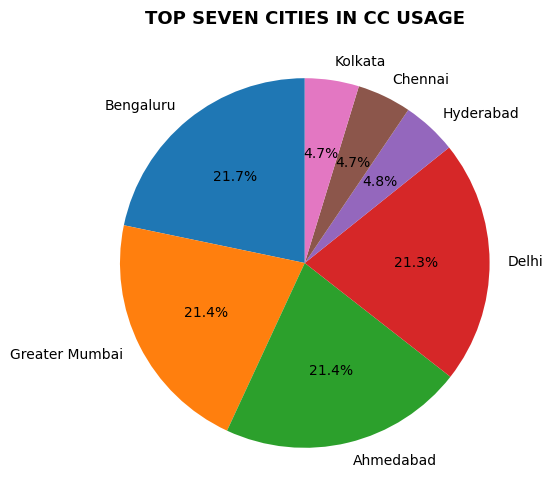

In [11]:
city_counts = df['City'].value_counts().head(7)
plt.figure(figsize=(8, 6))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('TOP SEVEN CITIES IN CC USAGE',fontsize=13,weight='bold')
plt.show()

*The city with the highest credit card usage is Bengaluru, followed by Mumbai, Ahmedabad and Delhi, in that order.*

### Plotting a bar chart to illustrate the gender distribution in credit card usage

Text(0, 0.5, 'Amount')

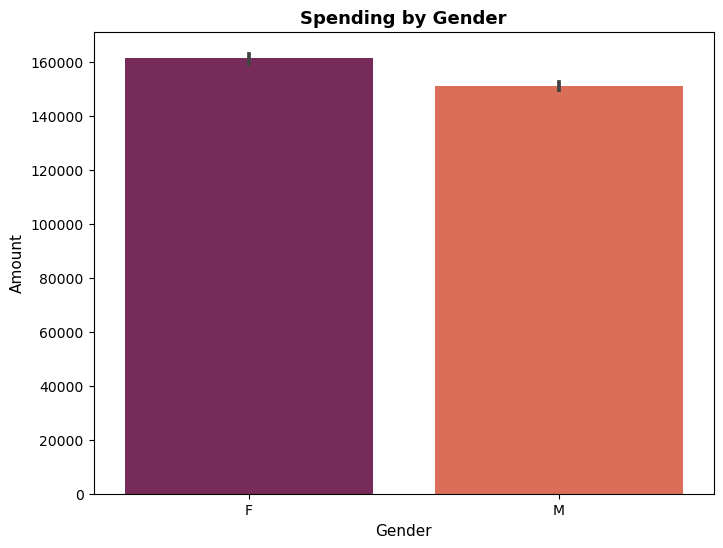

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Gender',y='Amount',palette='rocket').set_title('Spending by Gender',fontsize=13,weight='bold')
plt.xlabel('Gender',fontsize=11)
plt.ylabel('Amount',fontsize=11)

*There is a higher count of female users compared to male users.*

### Plotting a bar chart to depict the distribution of spending based on gender

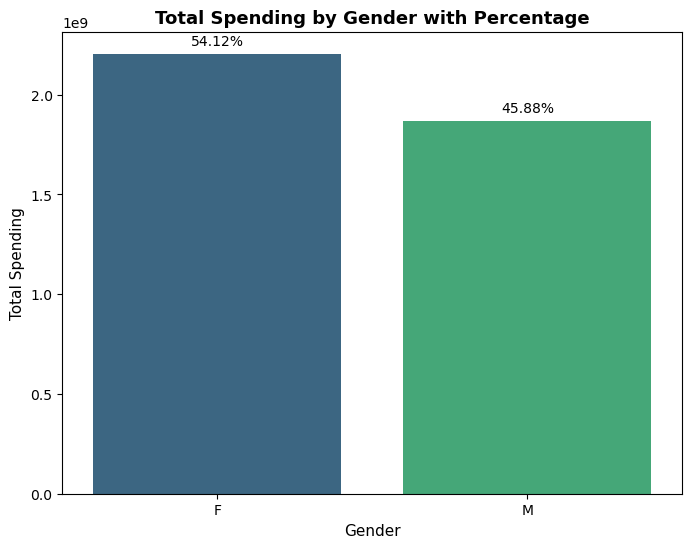

In [13]:
total_spending = df.groupby('Gender')['Amount'].sum().reset_index()
total_spending['Percentage'] = (total_spending['Amount'] / total_spending['Amount'].sum()) * 100
plt.figure(figsize=(8, 6))

plot = sns.barplot(x='Gender', y='Amount', data=total_spending, palette='viridis')
for p, perc in zip(plot.patches, total_spending['Percentage']):
    plot.annotate(f'{perc:.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
textcoords='offset points')
plt.title('Total Spending by Gender with Percentage',fontsize=13,weight='bold')
plt.xlabel('Gender',fontsize=11)
plt.ylabel('Total Spending',fontsize=11)
plt.show()

*The aggregate spending by females surpasses that of males, indicating a higher total expenditure among female users.*


### Plotting a pie chart to represent the distribution of the total amount spent based on different card types.


In [14]:
card_type_totals = df.groupby('Card Type')['Amount'].sum()
card_type_totals

Card Type
Gold          984539536
Platinum     1007639019
Signature    1013041105
Silver       1069613713
Name: Amount, dtype: int64

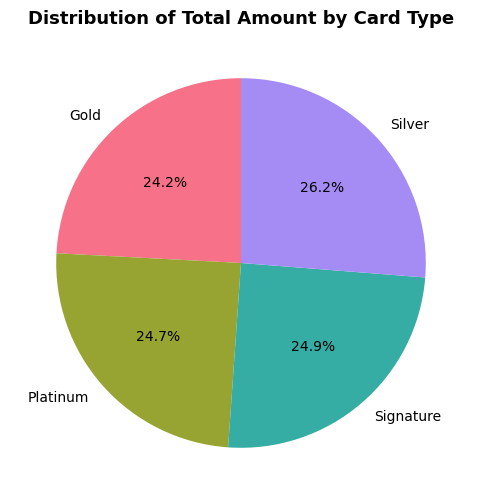

In [15]:
plt.figure(figsize=(8, 6))
bright_palette = sns.color_palette("husl", len(card_type_totals))
plt.pie(card_type_totals, labels=card_type_totals.index, autopct='%1.1f%%', startangle=90, colors=bright_palette)
plt.title('Distribution of Total Amount by Card Type',fontsize=13,weight='bold')
plt.show()

*While there is no significant disparity in the total amount spent among the various types of credit cards, the Silver credit card stands out with the highest total expenditure compared to the other three card types.*

### Plotting a bar chart for amount spent per Expense type

C:\Users\VINAMRATA CHHONKAR\AppData\Local\Temp\ipykernel_20432\667108104.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Exp Type', y='Amount', estimator=sum, ci=None, palette='viridis')


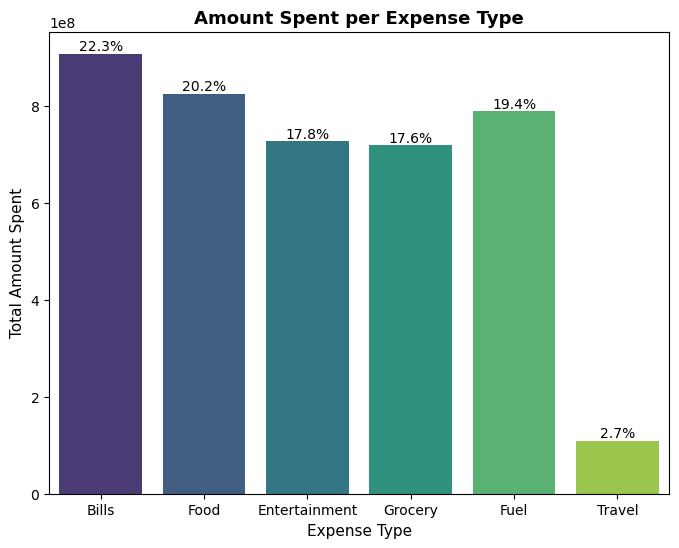

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Exp Type', y='Amount', estimator=sum, ci=None, palette='viridis')
total_amount = df['Amount'].sum()
for p in ax.patches:
 height = p.get_height()
 ax.annotate(f'{height/total_amount:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.title('Amount Spent per Expense Type',fontsize=13,weight='bold')
plt.xlabel('Expense Type',fontsize=11)
plt.ylabel('Total Amount Spent',fontsize=11)
plt.show()

*Based on the data, it is evident that people predominantly utilize credit cards for bill payments, with food and fuel expenses following closely as the next most common purposes for credit card usage.*

### Plotting a bar chart for total amount spent by card type and gender

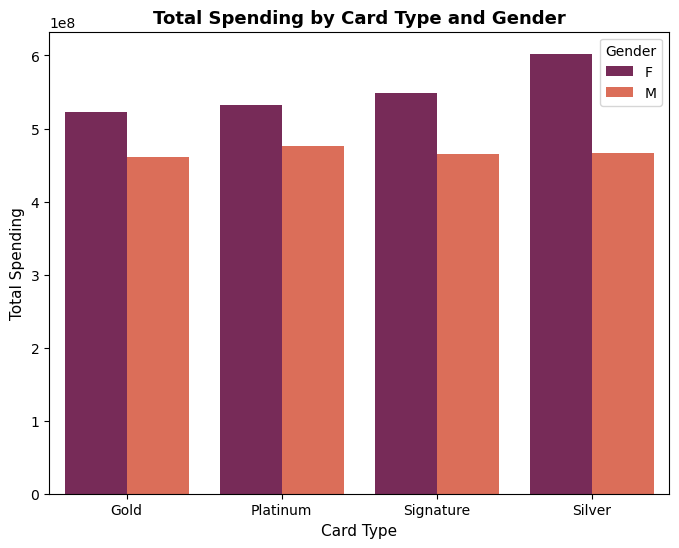

In [17]:
card_gender_totals = df.groupby(['Card Type', 'Gender'])['Amount'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Card Type', y='Amount', hue='Gender', data=card_gender_totals, palette='rocket')
plt.title('Total Spending by Card Type and Gender',fontsize=13,weight='bold')
plt.xlabel('Card Type',fontsize=11)
plt.ylabel('Total Spending',fontsize=11)
plt.show()

*The graph clearly indicates that Female users dominate across all types of credit cards.*

### Plotting a bar chart for Total Spending by Type of Expense and Gender

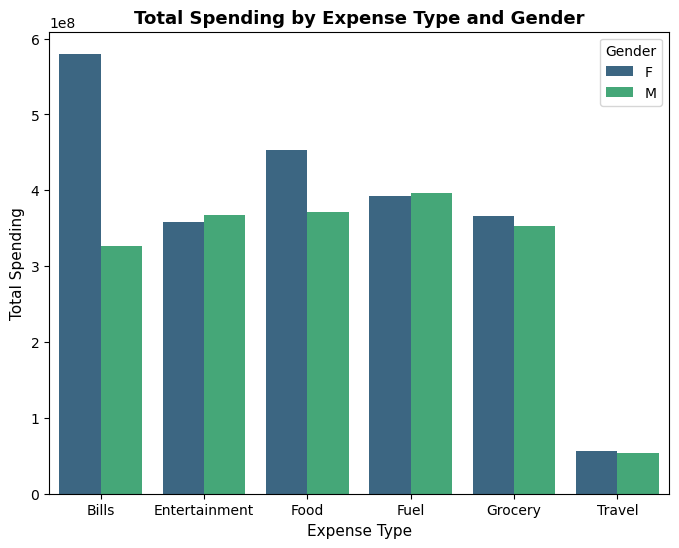

In [18]:
exp_gender_totals = df.groupby(['Exp Type', 'Gender'])['Amount'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Exp Type', y='Amount', hue='Gender', data=exp_gender_totals, palette='viridis')
plt.title('Total Spending by Expense Type and Gender',fontsize=13,weight='bold')
plt.xlabel('Expense Type',fontsize=11)
plt.ylabel('Total Spending',fontsize=11)
plt.show()

*The graph illustrates that females tend to have higher credit card expenditures on bills, food, and groceries compared to males. On the other hand, male credit card usage surpasses females in categories such as fuel and entertainment. This insight can assist credit card companies in refining their targeting strategies based on specific credit card types to better cater to distinct customer segments.*

### Creating a line graph to visually assess the trend in credit card usage over time

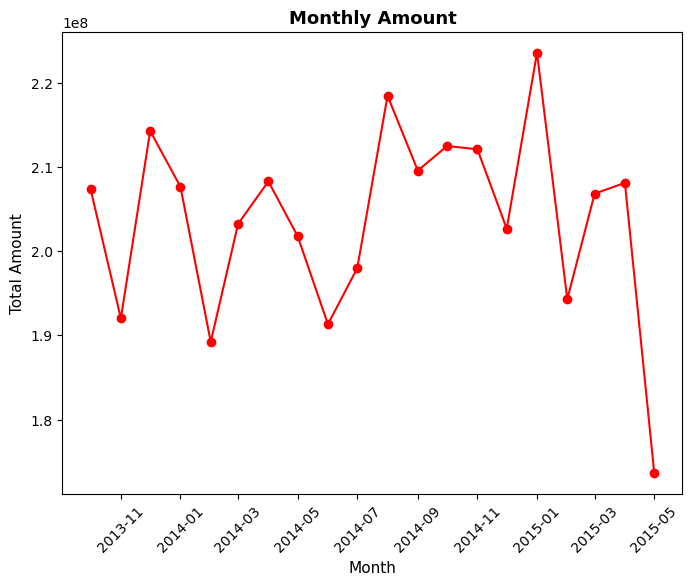

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
df['Amount'] = pd.to_numeric(df['Amount'])
monthly_data = df.groupby('Month')['Amount'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.plot(monthly_data['Month'].dt.to_timestamp(), monthly_data['Amount'], marker='o', linestyle='-',color='red')
plt.title('Monthly Amount',fontsize=13,weight='bold')
plt.xlabel('Month',fontsize=11)
plt.ylabel('Total Amount',fontsize=11)
plt.xticks(rotation=45)
plt.show()

*The utilization of credit cards experiences a surge during festive seasons in India.*

### KDE Graph: Common Spending Range Among Card Types

C:\Users\VINAMRATA CHHONKAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 400x400 with 0 Axes>

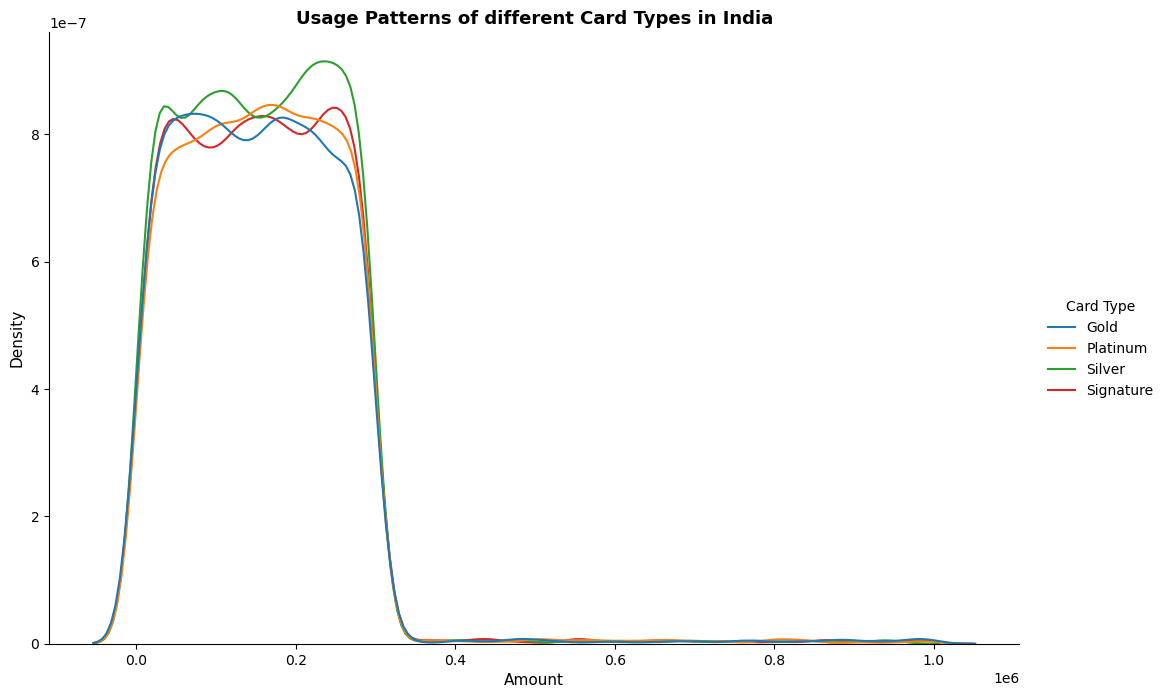

In [20]:
plt.figure(figsize=(4,4))
sns.displot(data=df, x='Amount', hue='Card Type', kind='kde',height= 7, aspect= 1.5)
plt.title('Usage Patterns of different Card Types in India',fontsize=13,weight='bold')
plt.xlabel('Amount',fontsize=11)
plt.ylabel('Density',fontsize=11)
plt.show()


- **Spending Range**: The density peaks for all card types are in a similar spending range, suggesting that most transactions fall within a comparable range regardless of the card type.
- **Density Distribution**: All four card types exhibit a high density of transactions up to approximately 0.3M, with very few transactions exceeding this amount.
- **Uniformity**: There is a uniform pattern across different card types, indicating that the usage habits of consumers do not vary significantly by card type.

Overall, the KDE graph suggests that spending behaviors are consistent across different types of credit cards in India.India.India.

### Strip Plot: Spending Habits by Card Type

C:\Users\VINAMRATA CHHONKAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VINAMRATA CHHONKAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


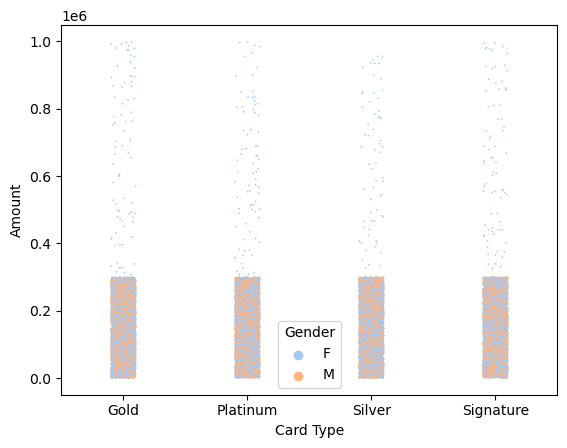

C:\Users\VINAMRATA CHHONKAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VINAMRATA CHHONKAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


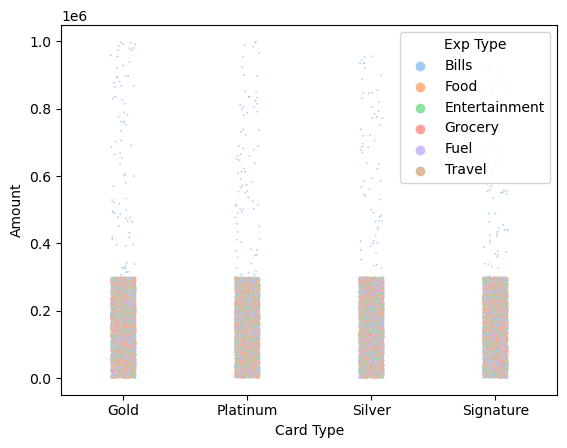

In [21]:
Descriptive_category=['Gender', 'Exp Type']
for m in Descriptive_category:
    sns.stripplot(data=df, x= 'Card Type', hue=m, y='Amount', alpha=1, palette='pastel', size=1.2 ),set
    plt.show()

*An interesting finding is that interactions with other labels are identical across card types. For gender, male users of four card types spend around 0.3M. Regarding expense type, bills stand out, while other expenses remain below 0.4M.*

# Conclusion

- Insights for refining targeting strategies
- Analysis based on user demographics, preferences, and seasonal trends
- Guidance for tailoring services to consumer needs
- Enhanced understanding of distinct consumer segments in India's dynamic credit card market
arketarket